In [5]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

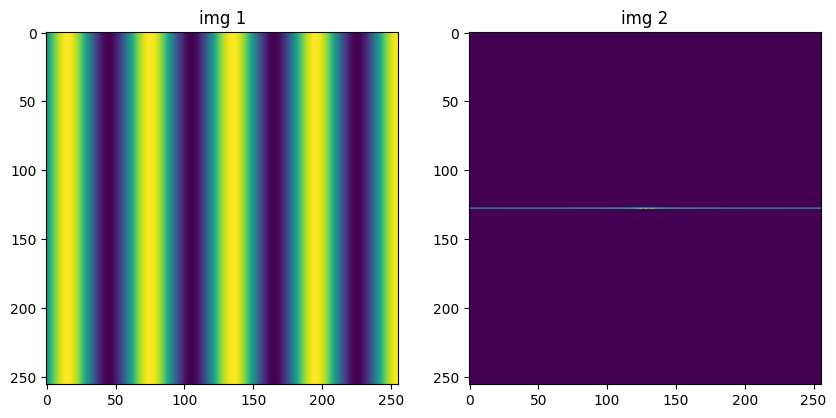

In [3]:
x = np.arange(256)
y = np.sin(2*np.pi*x/60)
y +=1

img = np.array([[y[j] for j in range(len(y))] for i in range(len(x))], dtype=np.float32)
img_dft = cv.dft(img, flags = cv.DFT_COMPLEX_OUTPUT)
img_dft_shifted = np.fft.fftshift(img_dft)

A = 20*np.log(cv.magnitude(img_dft_shifted[:,:,0], img_dft_shifted[:,:,1])+1)


f1, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,10))
ax1.set_title('img 1')
ax1.imshow(img)
ax2.set_title('Amplitude of FT')
ax2.imshow(A)

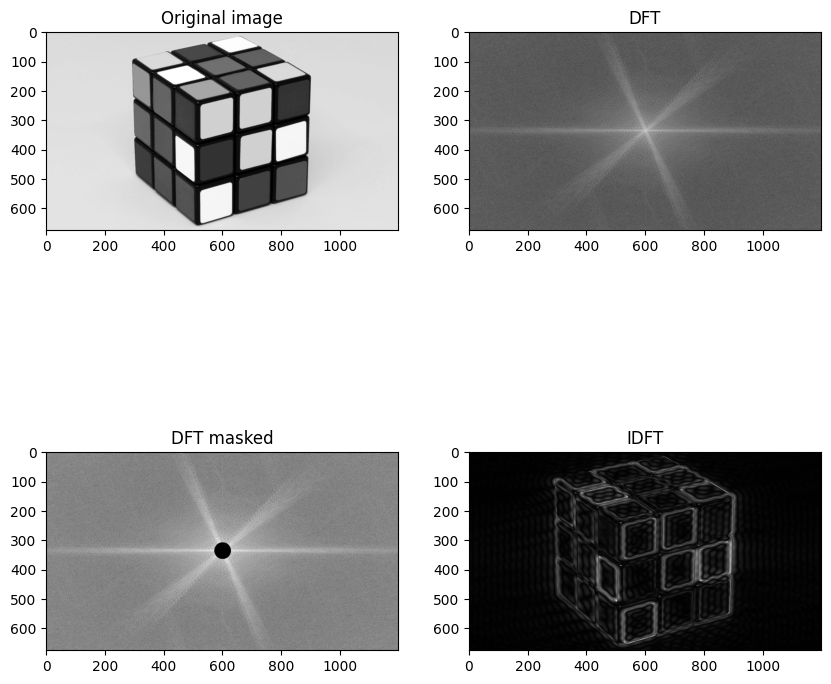

In [10]:
cube_img = cv.imread('/rubik.png')
cube_img = cv.cvtColor(cube_img, cv.COLOR_BGR2RGB)
cube_img_gray = cv.cvtColor(cube_img, cv.COLOR_RGB2GRAY)

#DFT
cube_img_dft = cv.dft(np.float32(cube_img_gray), flags = cv.DFT_COMPLEX_OUTPUT)

#Shifting to the center point of image
cube_img_dft_shifted = np.fft.fftshift(cube_img_dft)

#Calculating magnitude(for plotting)
A = 20*np.log(cv.magnitude(cube_img_dft_shifted[:,:,0], cube_img_dft_shifted[:,:,1])+1)

#Finding center of the image
center = np.array([cube_img.shape[0]/2, cube_img.shape[1]/2])

#Setting all of the pixels of mask within circle to 0
mask = np.ones((675,1200,2))

for i in range(mask.shape[0]):
    for j in range(mask.shape[1]):
        if ((i - center[0])**2 + (j-center[1])**2)<800:
            mask[i][j]=0

#Applying mask
cube_img_dft_shifted_masked = cube_img_dft_shifted*mask

#Calculating new magnitude(for plotting)
A_new = np.log(cv.magnitude(cube_img_dft_shifted_masked[:,:,0], cube_img_dft_shifted_masked[:,:,1])+1)

#Inverse to shift
cube_img_dft_unshifted_masked = np.fft.ifftshift(cube_img_dft_shifted_masked)

#IDFT
cube_img_new = cv.idft(cube_img_dft_unshifted_masked, flags=cv.DFT_SCALE)

#Changed image
cube_img_new = cv.magnitude(cube_img_new[:,:,0], cube_img_new[:,:,1])

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,10))

ax1.set_title('Original image')
ax1.imshow(cube_img_gray, cmap='gray')

ax2.set_title('DFT')
ax2.imshow(A, cmap='gray')

ax3.set_title('DFT masked')
ax3.imshow(A_new, cmap='gray')

ax4.set_title('IDFT')
ax4.imshow(cube_img_new, cmap='gray')